#### Ideas for NLP analysis of science article abstracts

- Generate bag of words 
- Clustering of processed words
- Regression/classification to predict the citations of an article (interface with citation count df)
- ^Which words add the most citation impact to an article? (feature contribution to model)

- generate abstract text (can we make an entirely new abstract from the abstracts we have understood?)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import string
from nltk.corpus import stopwords

In [2]:
# load in abstract text (json format)
import json

#with open('NAc_CiteDict.json', 'w') as fp:
#    json.dump(cite_dict, fp)
    
with open('NAcTopCited_AbzDict.json', 'r') as fp:
    abzDict = json.load(fp)
    
with open('NAcTopCited_AbzCited.json', 'r') as fp:
    abzCited = json.load(fp)    

In [3]:
abzDict.keys() == abzCited.keys()

True

In [4]:
# convert abz_dict dictionary to df with cols = pmid, abstract, length (of abstr),  ... citations ?

abz_df = pd.DataFrame(columns = ['pmid','abstract','citedByNof1000'])

for n,key in enumerate(abzDict.keys()):
    
    abz_df.loc[n] = [key,abzDict[key],abzCited[key]]

abz_df.head(5)

,pmid,abstract,citedByNof1000
0,28548226,The subdifferentiation of the nucleus accumben...,4
1,26818502,Nucleus accumbens (NAc) neurons encode feature...,9
2,26691834,We examined adaptations in nucleus accumbens (...,5
3,25834050,Neural circuits that determine the perception ...,4
4,25251489,Nearly 40 years of research on the function of...,42


In [5]:
# make new df column that gives length of abstract
abz_df['length'] = abz_df['abstract'].apply(len)
abz_df.head()

,pmid,abstract,citedByNof1000,length
0,28548226,The subdifferentiation of the nucleus accumben...,4,1577
1,26818502,Nucleus accumbens (NAc) neurons encode feature...,9,2440
2,26691834,We examined adaptations in nucleus accumbens (...,5,515
3,25834050,Neural circuits that determine the perception ...,4,1095
4,25251489,Nearly 40 years of research on the function of...,42,1011


count    1374.000000
mean     1439.411208
std       504.631025
min        44.000000
25%      1078.000000
50%      1487.500000
75%      1775.750000
max      4002.000000
Name: length, dtype: float64

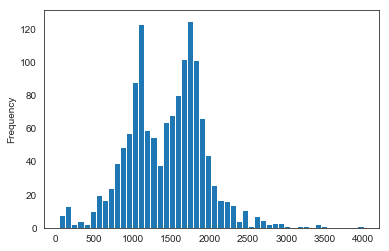

In [6]:
# make histogram of abstract length 

abz_df['length'].plot(bins=50, kind='hist') 


# get mean,std,stats on length of abstract
abz_df.length.describe()

count     1374
unique      35
top          4
freq       433
Name: citedByNof1000, dtype: int64

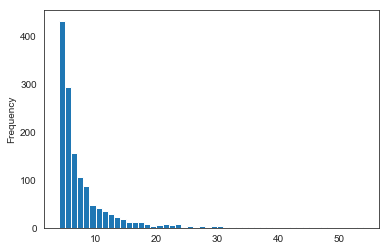

In [7]:
# make histogram of abstract length 

abz_df['citedByNof1000'].plot(bins=50, kind='hist') 


# get mean,std,stats on length of abstract
abz_df.citedByNof1000.describe()

In [8]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [9]:
# try applying removal of punctuation and stopwords from abstracts

#abz_df['wordlist'] = abz_df['abstract'].apply(text_process)

In [10]:
abz_df.head()

,pmid,abstract,citedByNof1000,length
0,28548226,The subdifferentiation of the nucleus accumben...,4,1577
1,26818502,Nucleus accumbens (NAc) neurons encode feature...,9,2440
2,26691834,We examined adaptations in nucleus accumbens (...,5,515
3,25834050,Neural circuits that determine the perception ...,4,1095
4,25251489,Nearly 40 years of research on the function of...,42,1011


In [11]:
# further normalize data by 'stemming' = finding the root of the word (running = run = ran)

In [12]:
# further normalize data by dissecting based on parts of speech (conjunction, verb, noun, adjective, adverb)

In [13]:
# then vectorize: (create bag-of-words) is like one-hot encoding of word frequency in a text observation

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(abz_df['abstract'])


In [15]:
# compare length of vectorized vocabulary to length of all abstracts
# this gives us a sense of how much words are being reused

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))
print(abz_df['length'].sum())


14968
1977751


In [16]:
# lets examine an example abstract transformed to bag-of-words

ex_abz = abz_df['abstract'][7]
print(ex_abz)

In addition to their well-established role in signaling rewarding outcomes and reward-predictive cues and in mediating positive reinforcement, there is growing  evidence that nucleus accumbens (NAc) neurons also signal aversive events and cues that predict them. Here we use diffusion tractography to subdivide the right NAc into lateral-rostral (putative core, pcore) and medial-caudal (putative shell, pshell) subdivisions in humans. The two subregions exhibited differential  structural connectivity, based on probabilistic tractography, to prefrontal cortical and subcortical limbic regions. We also demonstrate unique roles for each of the two subdivisions for monetary reward and thermal pain perception tasks: pshell signaling impending pain and value predictions for monetary gambles and pcore activating with anticipation of cessation of thermal pain (signaling reward value of analgesia). We examined functional connectivity for resting state, monetary reward, and thermal pain tasks, and f

In [17]:
# visualize structure of BoW
# each abstract (observation) is a row
# each word count bin is a column

ex_BoW = bow_transformer.transform([ex_abz])
print(ex_BoW[0:10])
print(ex_BoW.shape)

print(bow_transformer.get_feature_names()[4450])
print(bow_transformer.get_feature_names()[6481])

  (0, 3021)	6
  (0, 3273)	1
  (0, 4391)	1
  (0, 4450)	1
  (0, 4461)	1
  (0, 4506)	1
  (0, 4717)	2
  (0, 4799)	1
  (0, 4808)	1
  (0, 4884)	1
  (0, 5147)	1
  (0, 5201)	2
  (0, 5666)	1
  (0, 5825)	1
  (0, 6101)	1
  (0, 6141)	1
  (0, 6142)	5
  (0, 6300)	1
  (0, 6309)	1
  (0, 6359)	2
  (0, 6481)	2
  (0, 6712)	2
  (0, 6913)	1
  (0, 6914)	1
  (0, 6930)	1
  :	:
  (0, 12962)	1
  (0, 13103)	1
  (0, 13147)	1
  (0, 13150)	3
  (0, 13440)	2
  (0, 13585)	3
  (0, 13615)	2
  (0, 13622)	1
  (0, 13626)	3
  (0, 13661)	1
  (0, 13864)	1
  (0, 13918)	1
  (0, 13919)	1
  (0, 13925)	2
  (0, 14046)	3
  (0, 14067)	1
  (0, 14168)	2
  (0, 14320)	2
  (0, 14440)	1
  (0, 14525)	1
  (0, 14567)	1
  (0, 14575)	2
  (0, 14579)	1
  (0, 14778)	1
  (0, 14827)	1
(1, 14968)
activating
cues


In [18]:
# transform all abstract with previous fit BoW model

abz_BoW = bow_transformer.transform(abz_df['abstract'])

In [19]:
# see how sparse the BoW matrix is

print('Shape of Sparse Matrix: ', abz_BoW.shape)
print('Amount of Non-Zero occurences: ', abz_BoW.nnz)
print('Amount of all possible bins: ', abz_BoW.shape[0]*abz_BoW.shape[1])
print('Percent of sparse matrix filled: ', 100*abz_BoW.nnz/(abz_BoW.shape[0]*abz_BoW.shape[1]))
print('We generally see <1% filled')

Shape of Sparse Matrix:  (1374, 14968)
Amount of Non-Zero occurences:  126118
Amount of all possible bins:  20566032
Percent of sparse matrix filled:  0.6132344829571402
We generally see <1% filled


In [20]:
# rescale BoW in terms of TF-IDF
# TF = term frequency = (frequency of a word)/(total number of words in document)
# IDF = inverse document freq = (total number of documents)/(number of documents containing word)

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(abz_BoW)

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['reward']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['dopamine']])

2.2247941321395217
1.9957275625221897


In [21]:
abz_tfidf = tfidf_transformer.transform(abz_BoW)
print(abz_tfidf.shape)

(1374, 14968)


### Text clustering from abstracts using kmeans, LDA (topic-based clustering)


In [22]:
import collections
from sklearn.cluster import KMeans


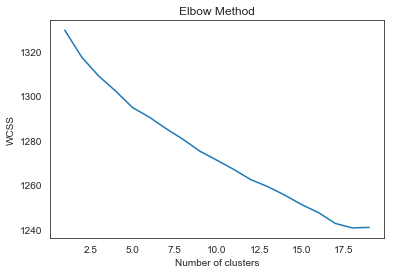

In [23]:

# We will test clustering with multiple cluster counts to find the best number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=57)
    kmeans.fit(abz_tfidf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [24]:
# ~18 clusters appears to be optimal
kmeans = KMeans(n_clusters=18, init='k-means++', max_iter=200, n_init=10, random_state=57)
clustID = kmeans.fit_predict(abz_tfidf)
print(clustID.shape)
print(list(clustID)[:100])

(1374,)
[8, 8, 8, 8, 8, 6, 10, 8, 10, 10, 10, 10, 8, 10, 8, 10, 5, 5, 15, 5, 15, 11, 10, 8, 4, 10, 10, 9, 11, 10, 8, 4, 8, 4, 15, 8, 14, 14, 17, 15, 14, 14, 4, 10, 14, 8, 5, 10, 10, 14, 3, 17, 10, 5, 17, 14, 17, 10, 17, 4, 15, 17, 5, 17, 5, 17, 17, 6, 10, 2, 3, 6, 6, 8, 0, 2, 8, 10, 9, 16, 13, 10, 0, 0, 0, 13, 10, 10, 13, 2, 13, 13, 17, 4, 4, 9, 10, 6, 9, 9]


In [26]:
# see if topics in clustered abstracts are similar

clust_choice = 8

for n in range(100):
    
    if clustID[n] == clust_choice:
        
        snippet = abz_df['abstract'][n]
        
        print(snippet[0:100])


The subdifferentiation of the nucleus accumbens (NAc) has been extensively studied using neuroanatom
Nucleus accumbens (NAc) neurons encode features of stimulus learning and action selection associated
We examined adaptations in nucleus accumbens (NAc) neurons in mouse and rat peripheral nerve injury 
Neural circuits that determine the perception and modulation of pain remain poorly understood. The p
Nearly 40 years of research on the function of the nucleus accumbens (NAc) has provided a wealth of 
In addition to their well-established role in signaling rewarding outcomes and reward-predictive cue
The nucleus accumbens (NAc) is involved in many reward-related behaviors. The NAc has two major comp
Efficient decision-making requires that animals consider both the benefits and the costs of potentia
The nucleus accumbens (NAc) is clearly implicated in reward processing and drug addiction, as well a
Retrieving and acting on memories of food-predicting environments are fundamental processes

In [27]:
## find the most common words for each cluster

In [28]:
def create_wordlist(doc):
    wl = []
    for word in doc:
        wl.append(word.lower())
    return wl

In [29]:
common_words = {}  
word_cnt = {}
    
for k in range(max(clustID)+1): 
    
    wordlist = []
    words = []

    for row in abz_df['abstract'][clustID == k]:

        #doc = row.split()
        doc = text_process(row)

        wl = create_wordlist(doc)

        wordlist = wordlist + wl

    # count the number of words
    word_counts = collections.Counter(wordlist)

    # Mapping from index to word : that's the vocabulary
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    vocabulary_inv = list(sorted(vocabulary_inv))

    # Mapping from word to index
    vocab = {x: i for i, x in enumerate(vocabulary_inv)}
    words = [x[0] for x in word_counts.most_common()]

    # print clustID
    print('cluster ID: ',k)
    
    #size of the vocabulary
    vocab_size = len(words)
    print("vocab size: ", vocab_size)

    # twenty most common words
    print(words[0:20])
    
    # save most common words in dictionary
    common_words[k] = words[0:20]
    
    # save word counts per cluster
    word_cnt[k] = word_counts
    

cluster ID:  0
vocab size:  2660
['dopamine', 'release', 'reward', 'neurons', 'accumbens', 'nucleus', 'phasic', 'changes', 'extracellular', 'nac', 'increase', 'rats', 'behavior', 'cocaine', 'stimuli', 'activity', 'learning', 'effects', 'rewards', 'cues']
cluster ID:  1
vocab size:  2141
['cocaine', 'reinstatement', 'seeking', 'drug', 'accumbens', 'glutamate', 'relapse', 'nucleus', 'rats', 'shell', 'extinction', 'nac', 'core', 'heroin', 'behavior', 'cueinduced', 'dopamine', 'cortex', 'selfadministration', 'results']
cluster ID:  2
vocab size:  2498
['da', 'release', 'nac', 'dopamine', 'neurons', 'accumbens', 'vta', 'effects', 'reward', 'nucleus', 'striatal', 'stimuli', 'receptors', 'effect', 'behavior', 'rats', 'cocaine', 'results', 'transmission', 'd2']
cluster ID:  3
vocab size:  3267
['cocaine', 'nac', 'withdrawal', 'accumbens', 'rats', 'selfadministration', 'nucleus', 'expression', 'drug', 'effects', 'increased', 'craving', 'neurons', 'levels', 'bdnf', 'changes', '1', 'behavioral', 

In [30]:
# make heatmap where each row is a cluster, columns are top words, pixels are how many times word comes up

In [31]:
top_words = []

for clus in common_words.keys():
    
    tmp = common_words[clus]
    tmp = tmp[:10]  # for the top 10 most common words in each cluster
    
    for wrd in tmp:
        
        if wrd not in top_words:
            
            top_words.append(str(wrd))

print(len(top_words))

95


In [32]:
# make df where each top_word is a column, each row is a cluster

top_word_cnt = pd.DataFrame(columns = top_words)


# find word count for top words for each cluster

for k in range(max(clustID)+1):
    
    tmp = []
    
    for col in top_word_cnt:
        
        tmp.append(float(word_cnt[k][col]))
        
    # divide word count by number of abstracts per cluster
    tmp = np.asarray(tmp) / float(len(clustID[clustID==k]))

    top_word_cnt.loc[k] = tmp
        
top_word_cnt.head(5)

,dopamine,release,reward,neurons,accumbens,nucleus,phasic,changes,extracellular,nac,...,interneurons,striatal,cholinergic,spiny,cells,basal,ganglia,activity,medial,areas
0,7.878049,1.914634,1.317073,1.182927,1.073171,1.000000,0.865854,0.682927,0.682927,0.646341,...,0.036585,0.170732,0.109756,0.012195,0.158537,0.121951,0.048780,0.573171,0.024390,0.109756
1,0.804878,0.146341,0.207317,0.451220,1.829268,1.268293,0.000000,0.207317,0.256098,1.024390,...,0.085366,0.024390,0.000000,0.060976,0.012195,0.036585,0.000000,0.365854,0.219512,0.073171
2,1.328571,1.671429,0.814286,1.314286,1.000000,0.757143,0.300000,0.300000,0.342857,1.442857,...,0.085714,0.671429,0.114286,0.014286,0.185714,0.100000,0.028571,0.442857,0.057143,0.042857
3,0.313869,0.065693,0.386861,0.700730,1.350365,1.116788,0.021898,0.649635,0.160584,1.708029,...,0.051095,0.043796,0.021898,0.167883,0.124088,0.153285,0.007299,0.576642,0.065693,0.036496
4,2.200000,0.114286,0.357143,2.328571,0.885714,0.914286,0.071429,0.428571,0.057143,1.242857,...,0.114286,0.585714,0.042857,0.657143,0.485714,0.228571,0.228571,0.485714,0.085714,0.057143


In [33]:
top_word_cnt.isnull().values.any()

False

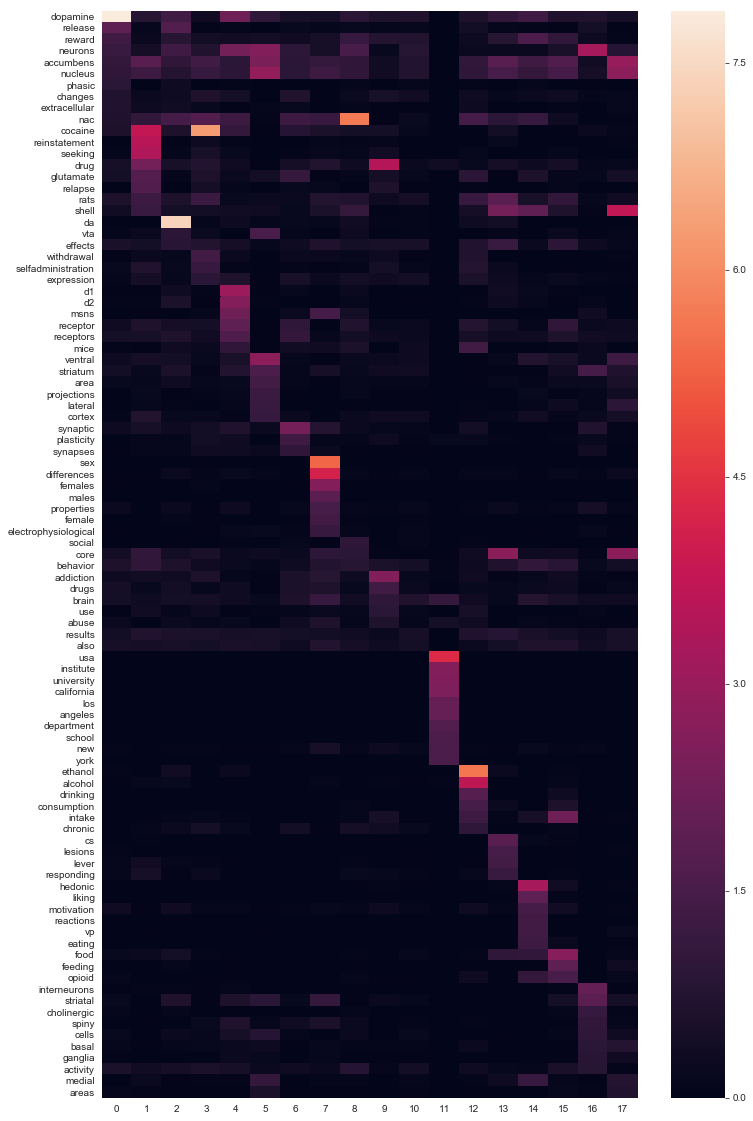

In [34]:
#
# color axis = mean # of word mentions per abstract in cluster

plt.figure(figsize=(12, 20))
sns.heatmap(top_word_cnt.T, annot=False)
#plt.show()

#plt.savefig('abstract_text_clustering.png',dpi=600)

In [35]:
# note: clustering 11 appears to be clustered on the basis on data mining error; 
# top terms are 'usa','university','department'
# this means that we scraped the author affilitations instead of the abstract from some articles

### It appears that our clustering actually worked extremely well, picking out known subfield groups from neuroscience field such as:
- Subfield studying dopamine and release
- Subfield studying rats and cocaine seeking and reinstatement (with focus on accumbens shell region)
- Subfield DA cells in VTA (ventral tegmental area)
- Subfield studying D1 and D2 type dopamine receptors expressed on MSNs
- Subfield studying synaptic plasticity at synapses
- Subfield studying sex differences between male and females rodents (usually using electrophysiology)
- subfield studying drug use and abuse
- 
